# Functions

In [1]:
def valueFilter(dataFrame,columnName,values):
    return dataFrame[~dataFrame[columnName].isin(values)]

# Formating Data

In [2]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics
from sklearn import linear_model, tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Import raw datasets

In [3]:
audi_raw = pd.read_csv('data/audi.csv')

In [4]:
bmw_raw = pd.read_csv('data/bmw.csv')

In [5]:
ford_raw = pd.read_csv('data/ford.csv')

In [6]:
hyundi_raw = pd.read_csv('data/hyundi.csv')

In [7]:
merc_raw = pd.read_csv('data/merc.csv')

In [8]:
skoda_raw = pd.read_csv('data/skoda.csv')

In [9]:
toyota_raw = pd.read_csv('data/toyota.csv')

In [10]:
vauxhall_raw = pd.read_csv('data/vauxhall.csv')

In [11]:
vw_raw = pd.read_csv('data/vw.csv')

# Merge into one dataframe

In [12]:
hyundi_raw = hyundi_raw.rename(columns={'tax(£)':'tax'})

In [13]:
df = [audi_raw, bmw_raw, ford_raw, hyundi_raw, merc_raw, skoda_raw, toyota_raw, vauxhall_raw, vw_raw]

In [14]:
cars = pd.concat(df)
cars['model'] = cars['model'].astype('category')
cars['transmission'] = cars['transmission'].astype('category')
cars['fuelType'] = cars['fuelType'].astype('category')
cars['year'] = cars['year'].astype('category')


In [15]:
cars['category'] = ' '
for i in range(0,len(cars)):
    if cars['price'].values[i] < 10000:
        cars['category'].values[i] = 'low-end'
    elif cars['price'].values[i] > 10000 & cars['price'].values[i] < 25000:
        cars['category'].values[i] = 'mid-end'
    else:
        cars['category'].values[i] = 'low-end'

cars['category'].astype('category')
cars_x = cars.drop('price', inplace = False, axis=1)
cars_x = cars_x.drop(['tax','category'], inplace = False, axis=1)

cars_y = cars['price']
cars_y2 = cars['category']
cars_x = pd.get_dummies(cars_x)
cars_x

,mileage,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,year_2060,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,15735,55.4,1.4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,36203,64.2,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,29946,55.4,1.4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,25952,67.3,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1998,49.6,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,74000,58.9,2.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,88102,46.3,1.2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,70000,42.0,1.4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,82704,46.3,1.2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
cars_x.shape

(99187, 234)

In [17]:
cars_y.shape

(99187,)

# Regression Model

### Linear Regression

In [18]:
cars_train, cars_test, price_train, price_test = train_test_split(cars_x, cars_y, test_size = 0.3, random_state=101)
cars_train, cars_test, cat_train, cat_test = train_test_split(cars_x, cars_y2, test_size = 0.3, random_state=101)


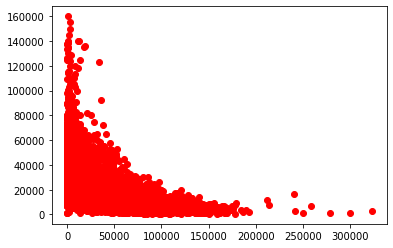

In [19]:
plt.plot(cars.mileage, cars.price, 'ro')

In [20]:
mod = linear_model.LinearRegression()
mod.fit(cars_train, price_train)

LinearRegression()

In [21]:
cars_pred = mod.predict(cars_test)

In [22]:
r2_score(price_test, cars_pred)

0.8677951813390343

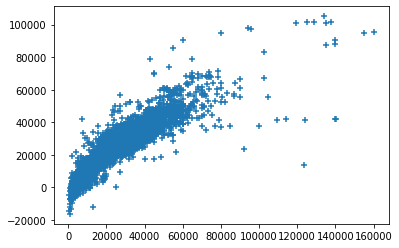

In [23]:
plt.scatter(price_test, cars_pred, marker='+')

### Ridge 

In [24]:
ridge = linear_model.Ridge(alpha = 1.0)
ridge.fit(cars_train, price_train)

Ridge()

In [25]:
cars_pred = ridge.predict(cars_test)

In [26]:
r2_score(price_test, cars_pred)

0.8662462739439201

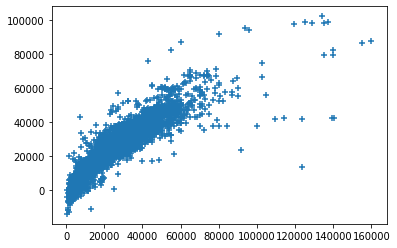

In [27]:
plt.scatter(price_test, cars_pred, marker = '+')

### Polynomial Regression

In [28]:
'''poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(cars_test)
polyLine = linear_model.LinearRegression()
polyLine.fit(poly_features_train, price_train)'''



'poly = PolynomialFeatures(degree=3, include_bias=False)\npoly_features_train = poly.fit_transform(cars_test)\npolyLine = linear_model.LinearRegression()\npolyLine.fit(poly_features_train, price_train)'

In [29]:
'''poly_features_test = poly.fit_transform(cars_test)
cars_pred = polyLine.predict(poly_features_test)
cars_pred.shape'''


'poly_features_test = poly.fit_transform(cars_test)\ncars_pred = polyLine.predict(poly_features_test)\ncars_pred.shape'

In [30]:
r2_score(price_test, cars_pred)

0.8662462739439201

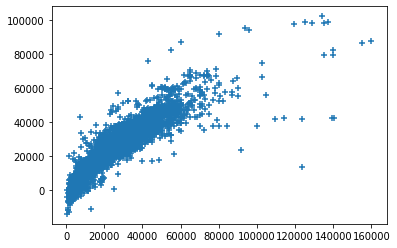

In [31]:
plt.scatter(price_test, cars_pred, marker = '+')

# Classification Model

### K-NN 

In [32]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(cars_train, cat_train)

KNeighborsClassifier(n_neighbors=30)

In [33]:
cat_pred = knn.predict(cars_test)

In [34]:
cat = confusion_matrix(cat_test, cat_pred)
cat

array([[ 1811,  5771],
       [ 1533, 20642]])

In [35]:
TP = cat[1][1]
TN = cat[0][0]
FP = cat[0][1]
FN = cat[1][0]
accuracy = (TP + TN)/(TP+TN+FP+FN)

In [36]:
accuracy

0.7545451490405619

### Decision Tree

In [37]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(cars_train, cat_train)

In [38]:
y_pred = dtree.predict(cars_test)

In [39]:
cat = confusion_matrix(cat_test, y_pred)
cat

array([[ 6646,   936],
       [  897, 21278]])

In [40]:
TP = cat[1][1]
TN = cat[0][0]
FP = cat[0][1]
FN = cat[1][0]
accuracy = (TP + TN)/(TP+TN+FP+FN)

In [41]:
accuracy

0.9384010484927916